In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('dataset02-09.csv', sep=";", header=0, encoding='cp1251') 

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111605 entries, 0 to 111604
Data columns (total 4 columns):
№         111605 non-null int64
дата      111605 non-null object
время     111605 non-null object
миксер    111605 non-null object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


,№,дата,время,миксер
0,1,02.02.2018,"00:00,0","19,3"
1,2,02.02.2018,"00:05,0","19,3"
2,3,02.02.2018,"00:10,0","19,3"
3,4,02.02.2018,"00:15,0","19,3"
4,5,02.02.2018,"00:20,0","19,4"


In [4]:
print(df.shape)

(111605, 4)


In [5]:
print(df.columns)

Index([u'№', u'дата', u'время', u'миксер'], dtype='object')


df.columns = df.columns.str.replace(',','')
df.columns = df.columns.str.replace('C','')
df.columns = df.columns.str.replace('°','')
df.head()

In [6]:
old_names = [u'№', u'дата', u'время', u'миксер']
new_names = [u'number', u'date', u'time', u'mikser'] 
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
print(df.columns)

Index([u'number', u'date', u'time', u'mikser'], dtype='object')


In [7]:
df.mikser = df.mikser.str.replace(',','.') 

In [8]:
mikser = df.mikser
df.mikser = pd.to_numeric(df.mikser, errors='raise', downcast=None)

In [9]:
#print mikser[1234]
len(df.number)
df.info()
cikl = pd.DataFrame(index = range(80) ,columns=np.arange(722), data = 0.0)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111605 entries, 0 to 111604
Data columns (total 4 columns):
number    111605 non-null int64
date      111605 non-null object
time      111605 non-null object
mikser    111605 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [10]:
porog = 140.0
delay = 5
diffT = 5
zames = 0
start = 0
startarray = []
zamesarray = []
k=0
for i in xrange(int(df.number[-18:-17])):
    if float(mikser[i])<porog:
        if float(mikser[i+delay])-float(mikser[i])>diffT:
            if i-start>400:
                zames += 1
                start = i
                startarray.append(start)
                print zames, start, mikser[i+delay], mikser[i], df.time[i]
    try:cikl[i-start][zames]=df.mikser[i]
    except KeyError: k+=1
    i += 1 

1 1836 26.5 19 33:00,0
2 3940 26.3 19.9 28:20,0
3 6668 27.6 22.1 15:45,0
4 8775 28.4 21.1 11:20,0
5 10168 22.6 15.5 07:25,0
6 11701 23.8 18 15:10,0
7 14439 18.8 12.7 03:20,0
8 16999 18 11.3 36:40,0
9 18855 17.7 11.7 11:20,0
10 19881 22.2 16.3 36:50,0
11 21437 23.4 16 46:30,0
12 24686 19.2 12.9 17:20,0
13 33960 34.3 26.7 10:10,0
14 35829 21.2 15 45:55,0
15 36244 77.8 72.4 20:30,0
16 37504 39.7 34.3 05:30,0
17 42632 28 22.8 12:55,0
18 44198 45.8 40.5 23:25,0
19 44910 39.5 34.3 22:45,0
20 45573 36.5 31.2 18:00,0
21 46303 46.2 40.9 18:50,0
22 47585 29.7 24.3 05:40,0
23 49093 34.3 29.1 11:20,0
24 49860 47 41.9 15:15,0
25 51056 30.7 25.5 54:55,0
26 53120 36.3 31.2 46:55,0
27 55463 38 32.6 02:10,0
28 56138 46 40.5 58:25,0
29 57836 24.8 19.7 19:55,0
30 59742 20.5 13.8 58:50,0
31 60518 28.4 22.8 03:30,0
32 61388 28.8 23.5 16:00,0
33 62352 32.9 23 36:20,0
34 63249 31.9 26 51:05,0
35 64162 37.9 32.7 07:10,0
36 66414 29.2 24 14:50,0
37 67228 49.6 44.4 22:40,0
38 70325 22.3 16.6 40:45,0
39 72219 34

In [11]:
cikl

,0,1,2,3,4,5,6,7,8,9,...,712,713,714,715,716,717,718,719,720,721
0,19.3,19.3,19.3,19.3,19.4,19.4,19.4,19.4,19.4,19.4,...,18.8,18.7,18.7,18.7,18.8,18.8,18.7,18.7,18.7,18.7
1,19.0,19.6,20.5,21.8,23.5,26.5,29.3,31.1,32.5,33.4,...,27.9,28.0,27.9,27.9,27.9,27.8,27.9,27.8,27.8,27.8
2,19.9,20.2,20.9,21.7,23.6,26.3,29.8,32.2,34.0,35.3,...,35.0,34.8,34.8,34.8,34.8,34.7,34.7,34.7,34.7,34.6
3,22.1,22.7,23.7,25.1,26.3,27.6,29.4,31.2,32.6,33.9,...,27.2,27.2,27.1,27.1,27.1,27.1,27.1,27.1,27.0,26.9
4,21.1,21.1,21.1,22.0,24.7,28.4,31.3,33.0,34.1,35.1,...,25.9,25.8,25.7,25.7,25.6,25.5,25.5,25.4,25.4,25.2
5,15.5,15.8,16.7,18.5,20.4,22.6,24.7,26.4,28.0,29.1,...,31.2,31.2,31.1,31.1,31.2,31.2,31.2,31.3,31.3,31.3
6,18.0,18.1,18.0,18.5,20.8,23.8,26.0,27.5,28.4,29.2,...,26.2,26.2,26.2,26.2,26.1,26.0,26.0,25.8,25.7,25.6
7,12.7,13.2,13.9,15.2,16.9,18.8,20.2,21.1,22.3,23.3,...,20.0,20.1,20.1,20.1,20.1,20.0,20.0,20.0,19.9,19.9
8,11.3,11.4,11.5,12.7,14.9,18.0,20.4,22.2,23.3,24.2,...,21.7,21.6,21.5,21.5,21.5,21.5,21.4,21.3,21.3,21.3
9,11.7,11.7,15.0,15.7,16.4,17.7,19.7,21.2,22.5,23.6,...,21.2,21.2,21.1,21.1,21.2,21.1,21.0,20.9,20.9,20.8


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

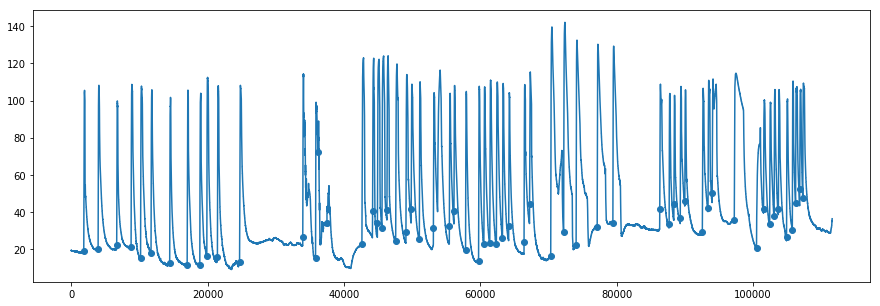

In [13]:
plt.figure(figsize=(15, 5)) # размер графика в дюймах
plt.plot(df.number,df.mikser) #отрисовка линии
plt.scatter(df.number[startarray],df.mikser[startarray]) #отрисовка точек начала цикла

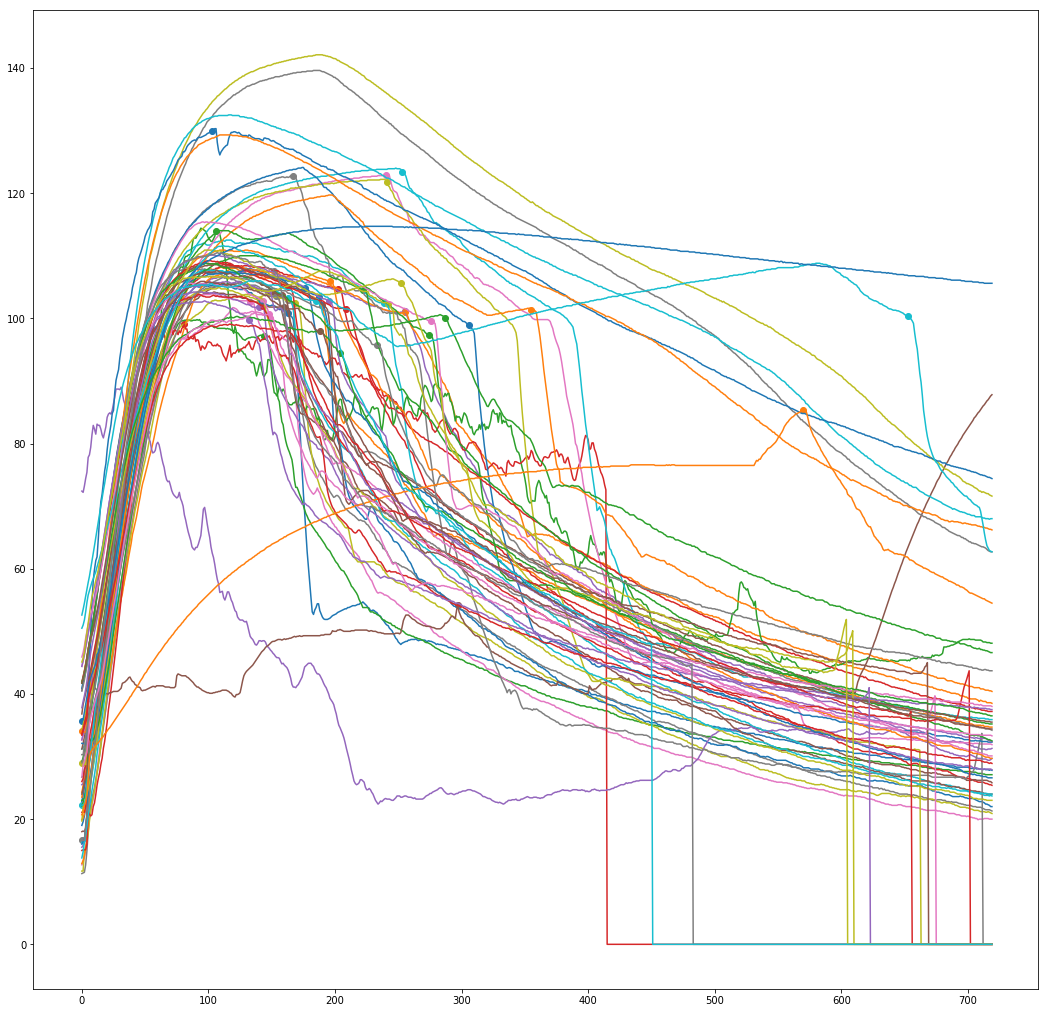

In [14]:
xarray = []
temparray = []
y = 0
switch = 0
plt.figure(figsize=(18,18))
for i in range(1,61):
    line = cikl.loc[i,:]
    for x in xrange(717):
        if switch==0:
            if x > 50:
                if line[x]-line[x+delay]>1.8: #если падение больше 2 граусов за 25 секунд - delay*период сигнала
                    switch = 1 # одна точка на графике 
                    y = x # запоминаем номер
                    #print y
        x +=1
    switch = 0
    #print line
    plt.plot(xrange(720),line[:720])  # отрисовка линий
    plt.scatter(y,line[y])  # отрисовка точек
    #print y, line[y]
    xarray.append(y)
    temparray.append(line[y])
    #print np.mean(xarray),np.mean(line[xarray])
    y = 0
#print xarray,line[xarray]
#plt.scatter(np.mean(xarray),np.mean(temparray), color='yellow')

In [15]:
tmikser = []
tmikser.append([max(cikl.loc[i,:]) for i in range(61)])
#print tmikser
#print np.array(xarray)*5/60.0
#print temparray
print 'Средняя максимальная температура в миксере = ', np.mean(tmikser)
print 'Средняя начальная температура в миксере = ', np.mean(cikl.loc[:,1])
print 'Средняя температура перед выгрузкой из миксера =',np.mean(temparray), 'градусов С°'
print 'Среднее время от начала цикла до начала выгрузки = ',np.mean(np.array(xarray)*5/60.0), ' минут'

Средняя максимальная температура в миксере =  107.918032787
Средняя начальная температура в миксере =  23.69125
Средняя температура перед выгрузкой из миксера = 96.205 градусов С°
Среднее время от начала цикла до начала выгрузки =  15.6375  минут


In [16]:
from sklearn.cluster import KMeans
chisloclasterov = 4
kmeans = KMeans(n_clusters=chisloclasterov).fit(cikl)
kmeans.labels_


array([0, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 3,
       3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

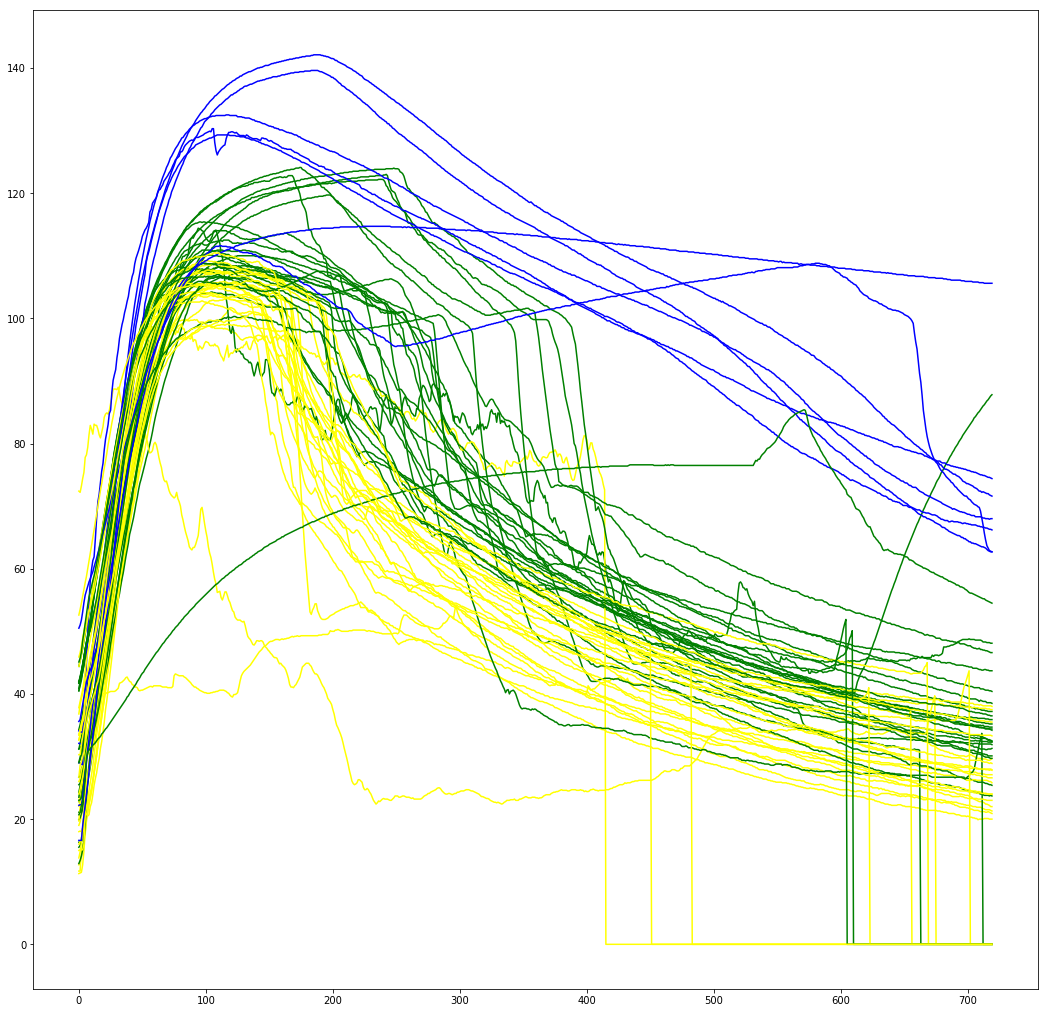

In [17]:
plt.figure(figsize=(18,18))
for i in range(1,61):
    colors = ['red','green','blue','yellow','black','gray','orange','brown']
    for z in range(chisloclasterov):
        if kmeans.labels_[i]==z:
            line = cikl.loc[i,:]
            plt.plot(xrange(720),line[:720],color=colors[z])        